# LESSON 1 EDA INTRODUCTION

Project Title: Exploratory Data Analysis of Nigerian Road Traffic Crashes (2020-2024)
Objective: Analyze and identify trends, patterns, and key insights related to road traffic crashes in Nigeria
from 2020 to 2024. Your objective is to uncover trends by quarter and state, assess the impact of crashes,
and identify potential high-risk areas or contributing factors.
In recent years, road traffic crashes have become a significant public safety issue in Nigeria, impacting
thousands of lives. The Nigerian Federal Road Safety Commission (FRSC) has collected detailed crash data
from 2020 to 2024, hoping to use this information to design effective policies, implement safety
improvements, and raise public awareness. However, the FRSC lacks a clear understanding of trends, highrisk areas, and the critical factors contributing to crashes.
As data analysts, your team has been tasked by the FRSC with conducting an exploratory analysis of this
crash data. You aim to help them identify patterns over time and understand factors contributing to severe
injuries and fatalities. The FRSC is particularly interested in insights about the following:
1. State-by-State Risk Assessment: Determining which states have the highest number of crashes and
fatalities, and examining if certain areas consistently show high crash frequencies.
2. Trend Analysis by Quarter and Year: Observe crashes, injuries, and fatalities trends across different
quarters and years to understand seasonal or temporal peaks.
3. Impact of Crash Factors: Exploring which factors (like vehicle involvement, driver conditions, or external
conditions) might lead to more severe outcomes, such as higher injury or fatality rates.

About the data: The dataset has sevral columns that describe various crash metrics per state for Q4 2020: These include:
1. Quarter - The quarter of the year when crashes were reported.
2. State - The state in Nigeria where crashes occurred.
3. Total_Crashes - Total number of crashes reported.
4. Num_Injured - Number of individuals injured.
5. Num_Killed - Number of fatalities.
6. Total_Vehicles_Involved - Total vehicles involved in the crashes.
7. SPV, DAD, PWR, FTQ - Different contributing factors or vehicle types (meanings need further
clarification).
8. Other_Factors - Additional unspecified contributing factors. 

Dataset: Nigerian_Road_Traffic_Crashes_2020_2024.cvs
Data Source: https://www.kaggle.com/datasets/akinniyiakinwande/nigerian-traffic-crashes-2020-2024

In [5]:
# import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
import os 
print(os.getcwd())

C:\Users\proma\DataScience


In [7]:
#Loading the dataset 
data = pd.read_csv('C:/Users/proma/DataScience/Nigerian_Road_Traffic_Crashes_2020_2024.csv')
data.head(5)
print(data)

     Quarter      State  Total_Crashes  Num_Injured  Num_Killed  \
0    Q4 2020       Abia             30          146          31   
1    Q4 2020    Adamawa             77          234          36   
2    Q4 2020  Akwa Ibom             22           28           7   
3    Q4 2020    Anambra             72          152          20   
4    Q4 2020     Bauchi            154          685          90   
..       ...        ...            ...          ...         ...   
513  Q1 2024     Rivers             15           32           4   
514  Q1 2024     Sokoto             24          122          41   
515  Q1 2024     Taraba             38           98          17   
516  Q1 2024       Yobe             39          234          13   
517  Q1 2024    Zamfara             13           61          14   

     Total_Vehicles_Involved  SPV  DAD  PWR  FTQ  Other_Factors  
0                         37   19    0    0    0             18  
1                         94   57    0    0    0             37

In [8]:
#data information 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Quarter                  518 non-null    object
 1   State                    518 non-null    object
 2   Total_Crashes            518 non-null    int64 
 3   Num_Injured              518 non-null    int64 
 4   Num_Killed               518 non-null    int64 
 5   Total_Vehicles_Involved  518 non-null    int64 
 6   SPV                      518 non-null    int64 
 7   DAD                      518 non-null    int64 
 8   PWR                      518 non-null    int64 
 9   FTQ                      518 non-null    int64 
 10  Other_Factors            518 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 44.6+ KB


In this data we have observed that there are 518 rows and 11 columns and only two columns are categorical, whereas the rest are numerical. This data set has also showed as that there are no missing values (given by 'non-null') 

In [10]:
#Statistical Sumamry

data.describe()
#result only given for numerical columns 
#but if you want the categorical columns as well use function INCLUDE
data.describe(include = 'all').transpose()
#use TRANSPOSE FUNCTION TO show data as present on file
#Find mean value separately because of greater accuracy than with table

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Quarter,518,14,Q4 2020,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,518,37,Abia,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Crashes,518.0,NaN,NaN,NaN,83.517375,77.023061,1.0,30.0,58.0,107.75,538.0
Num_Injured,518.0,NaN,NaN,NaN,245.631274,201.131483,2.0,96.25,185.5,331.5,1149.0
Num_Killed,518.0,NaN,NaN,NaN,40.600386,36.858302,0.0,15.0,30.0,55.75,224.0
Total_Vehicles_Involved,518.0,NaN,NaN,NaN,100.667954,108.567113,0.0,32.0,64.0,134.75,864.0
SPV,518.0,NaN,NaN,NaN,37.903475,57.093042,0.0,0.0,15.0,55.0,340.0
DAD,518.0,NaN,NaN,NaN,0.140927,0.45432,0.0,0.0,0.0,0.0,4.0
PWR,518.0,NaN,NaN,NaN,0.355212,1.677385,0.0,0.0,0.0,0.0,25.0
FTQ,518.0,NaN,NaN,NaN,23.824324,51.024267,0.0,0.0,0.0,21.0,425.0


In [11]:
#Check for MISSING VALUES 
data.isnull().sum()

#Sum is used to add the missing values. If there are none = 0

Quarter                    0
State                      0
Total_Crashes              0
Num_Injured                0
Num_Killed                 0
Total_Vehicles_Involved    0
SPV                        0
DAD                        0
PWR                        0
FTQ                        0
Other_Factors              0
dtype: int64

# LESSON 2 NIGERIA CAR CRUSH
## Univariate analyis is where you focus only on 
- single column
- categorical data
- numerical data


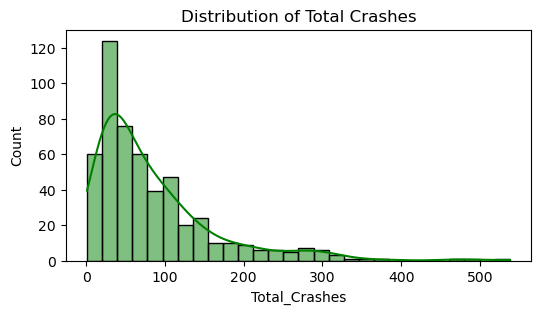

In [13]:
#Districution of Total Crashes
#Using HISTOGRAM becasue displays DISTRIBUTION OF CONTINUOUS DATA

plt.figure(figsize=(6, 3)) #size of graph
sns.histplot(data['Total_Crashes'], kde = True, color = 'green')
plt.title('Distribution of Total Crashes')
plt.show()


Line on graph shows KDE. This helps to understand the distribution in a more detail manner. 
Skewness of data is positevely skewed because heavy part is in one direction and to the left. 
If data is symmetrical, then = normal distribution 

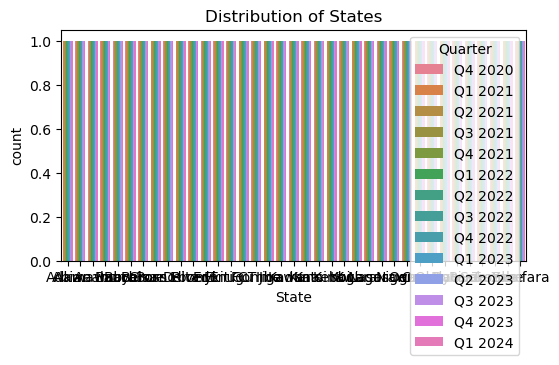

In [15]:
#Count Plot 
plt.figure(figsize=(6, 3)) #size of graph
sns.countplot(x = 'State', data = data, hue = 'Quarter')
plt.title('Distribution of States')
plt.show()
#THIS LOOKS MESSY, INTEAD FOLLOW CODE BELOW 

## For Categorical Data 

C:\Users\proma\AppData\Local\Temp\ipykernel_11432\3304853675.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'State', data = data, order = orderstate, palette= 'viridis') #viridis improves colour


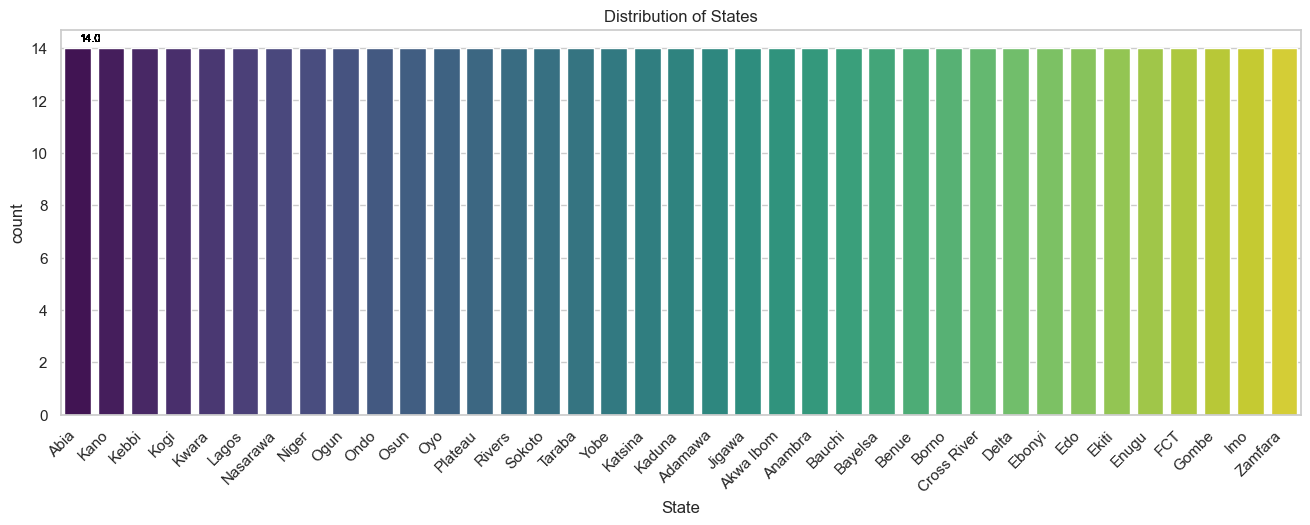

In [17]:
#Count Plot REVISED for State 
sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 5))
orderstate = data['State'].value_counts().index 
sns.countplot(x = 'State', data = data, order = orderstate, palette= 'viridis') #viridis improves colour
for p in plt.gca().patches: 
    plt.gca().annotate(f'{p.get_height()}', (p.get_width()/2., p.get_height()), ha = 'center',
                       va = 'baseline', fontsize = 8, color = 'black', xytext = (0,5), textcoords = 'offset points')


plt.xticks(rotation = 45, ha = 'right')

plt.title('Distribution of States')
plt.show()
#gca will make the writing more neater, and will no mix up the words 

## Explaining the code above 

1. for p in = this stands for each and every bar/element/parameter
2. plt.cga().patches = helps us to get the access to define the current chart, patches represents all bars
3. plt.gca = graphical access
4. annotate = working on the name of states, the variables, on the basis of each state
5. height =  the height difference between the bar and the name displayed on graph, i.e. position
6. centre = name of state centered to the bar 
7. xytext = coordinate difference of x and y, how the name should be reflecting
8. plt.xtciks = rotating the text 45 degrees in the right direction

All this can be used for other libraries and for bar charts

# Lesson 3 - EDA Reports
## Includes Presentation Example

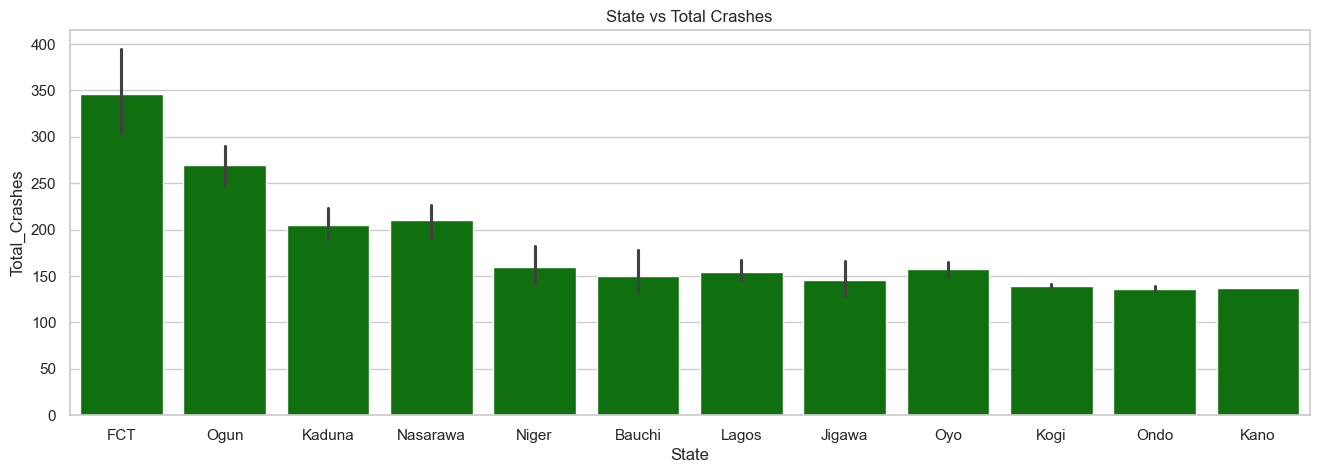

In [19]:
#Total crashes vs state 
plt.figure(figsize = (16, 5))
sorted = data.sort_values(by = 'Total_Crashes', ascending = False).head(100) #performs sorting 
sns.barplot(x = 'State', y = 'Total_Crashes', data = sorted, color = 'green')
plt.title('State vs Total Crashes')
plt.show()

In [30]:
#Split the data - Quarter
data['Year'] = data['Quarter'].apply(lambda x: x.split()[1])
data['Quarter'] = data['Quarter'].apply(lambda x: x.split()[0])

data.head()

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors,Year
0,Q4,Abia,30,146,31,37,19,0,0,0,18,2020
1,Q4,Adamawa,77,234,36,94,57,0,0,0,37,2020
2,Q4,Akwa Ibom,22,28,7,24,15,0,0,1,8,2020
3,Q4,Anambra,72,152,20,83,43,1,0,0,39,2020
4,Q4,Bauchi,154,685,90,140,74,0,0,0,66,2020


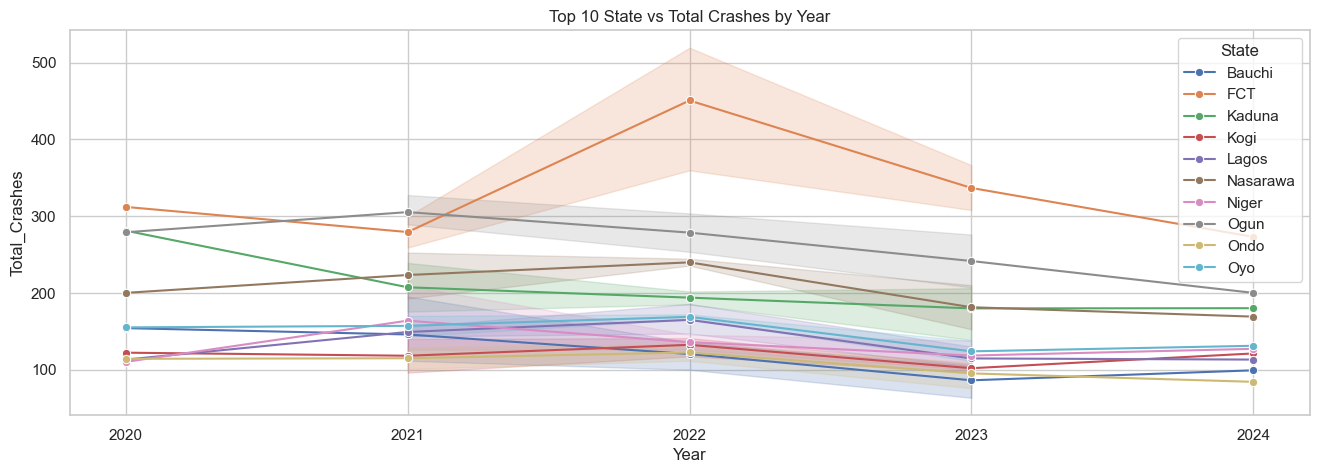

In [40]:
top_states = data.groupby('State')['Total_Crashes'].sum().nlargest(10).index

top_10 = data[data['State'].isin(top_states)]

plt.figure(figsize = (16, 5)) 
sns.lineplot(x = 'Year', y = 'Total_Crashes', data = top_10, hue = 'State', marker = 'o')
plt.title('Top 10 State vs Total Crashes by Year')
plt.show()
#output: year 2022 was the year with the most number of crashes

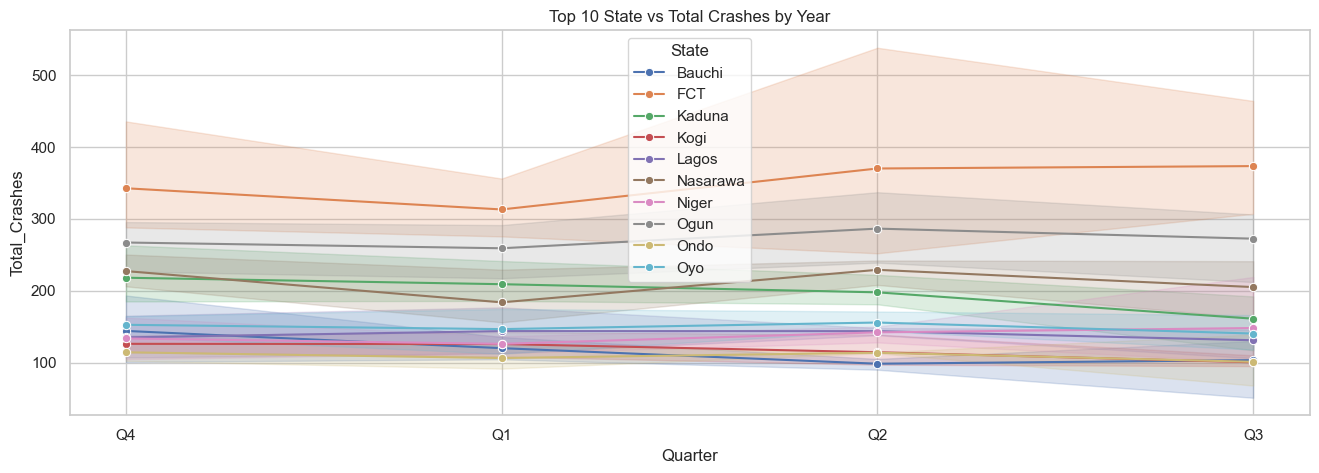

In [44]:
top_states = data.groupby('State')['Total_Crashes'].sum().nlargest(10).index

top_10 = data[data['State'].isin(top_states)]

plt.figure(figsize = (16, 5)) 
sns.lineplot(x = 'Quarter', y = 'Total_Crashes', data = top_10, hue = 'State', marker = 'o')
plt.title('Top 10 State vs Total Crashes by Year')
plt.show()
#output: we observe that Q2 was the most dangerous out of every other quarter every year because it had the higher number of crashes

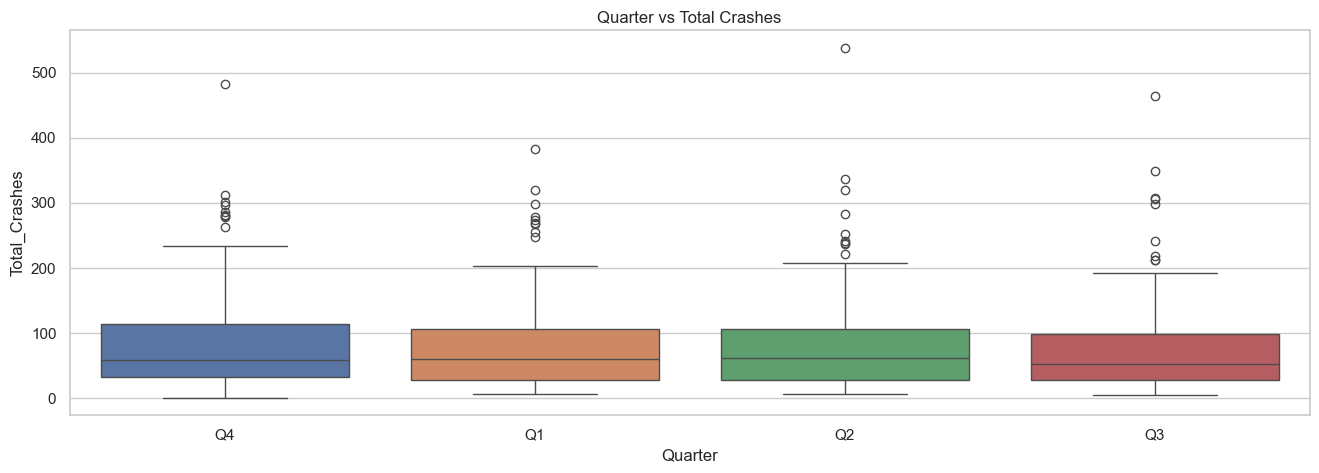

In [52]:
#Quarter vs Totatl_Crashes
plt.figure(figsize = (16, 5)) 
sns.boxplot(x = 'Quarter', y = 'Total_Crashes', data = data, hue = 'Quarter')
plt.title('Quarter vs Total Crashes')
plt.show()
#output: lowest accidents on quarter 1

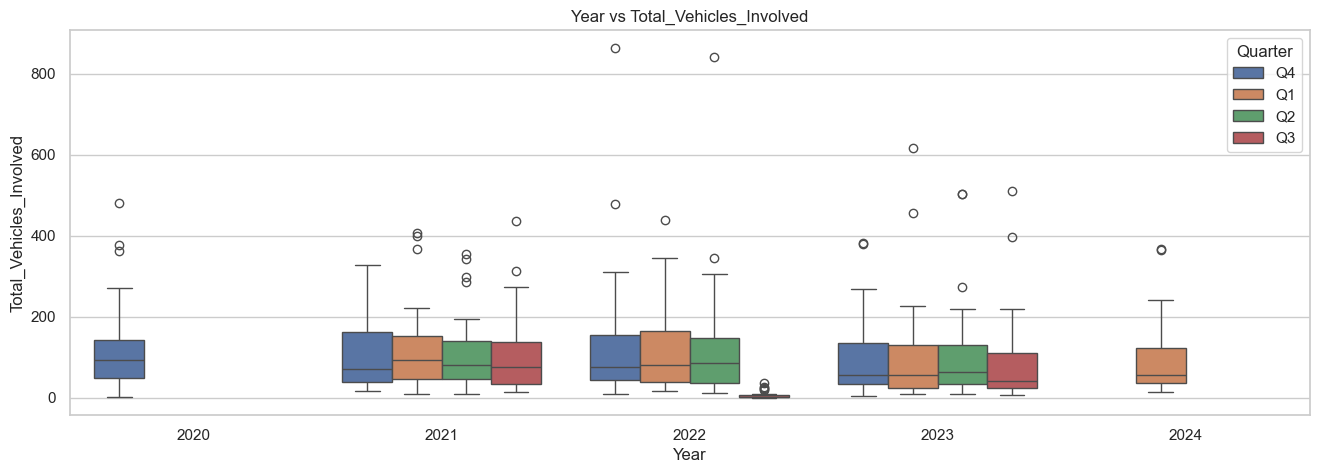

In [54]:
#Year vs Total_Vehicles_Involved
plt.figure(figsize = (16, 5)) 
sns.boxplot(x = 'Year', y = 'Total_Vehicles_Involved', data = data, hue = 'Quarter')
plt.title('Year vs Total_Vehicles_Involved')
plt.show()

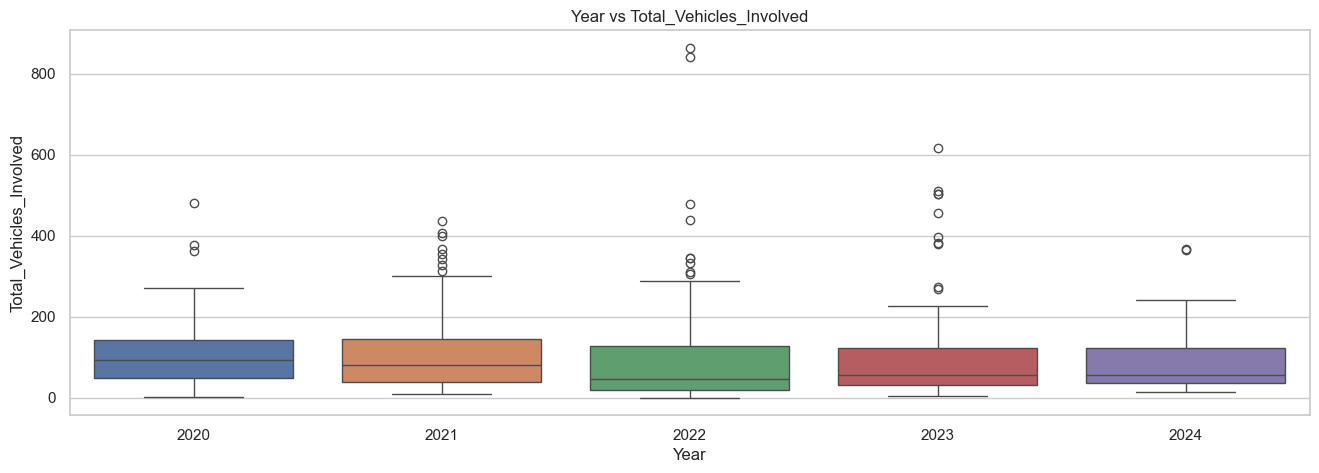

In [56]:
#Year vs Total_Vehicles_Involved
plt.figure(figsize = (16, 5)) 
sns.boxplot(x = 'Year', y = 'Total_Vehicles_Involved', data = data, hue = 'Year')
plt.title('Year vs Total_Vehicles_Involved')
plt.show()

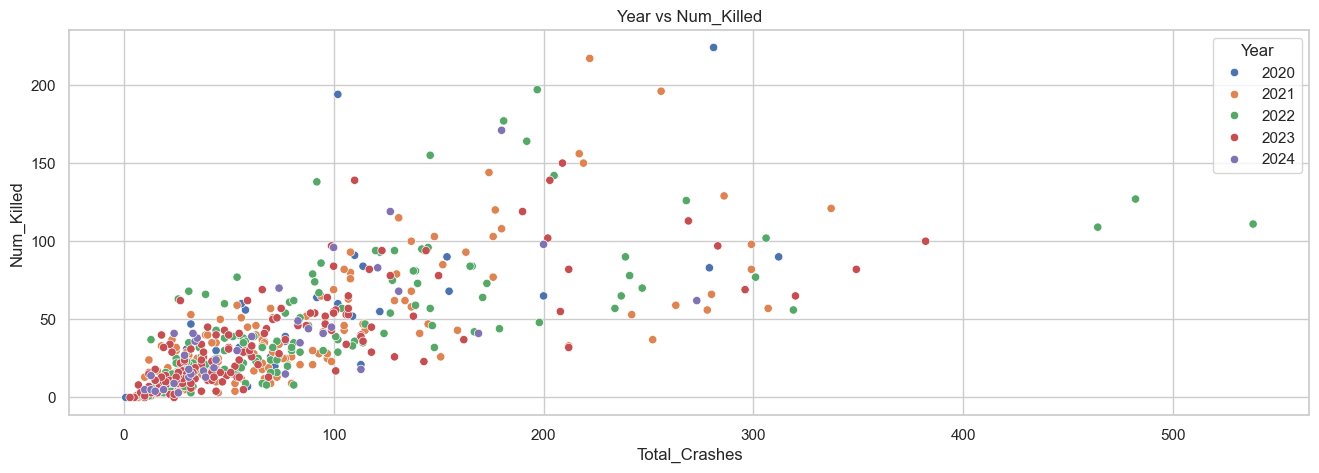

In [64]:
#Year vs Num_Killed
plt.figure(figsize = (16, 5)) 
sns.scatterplot(x = 'Total_Crashes', y = 'Num_Killed', data = data, hue = 'Year')
plt.title('Year vs Num_Killed')
plt.show()

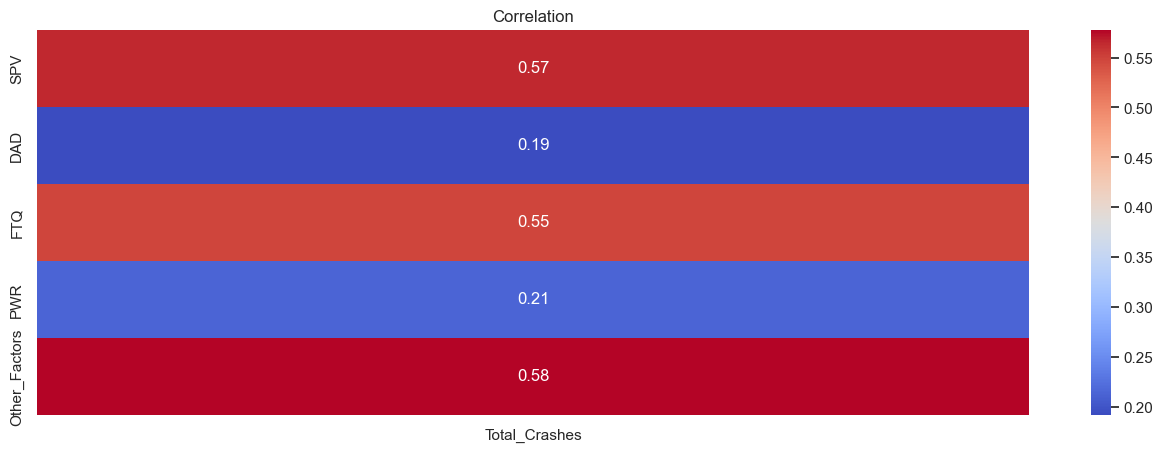

In [74]:
#Heat Map
corr_rel = data[['Total_Crashes', 'SPV', 'DAD', 'FTQ', 'PWR', 'Other_Factors']].corr()

corr_data = corr_rel[['Total_Crashes']].loc()[['SPV', 'DAD', 'FTQ', 'PWR', 'Other_Factors']]

plt.figure(figsize = (16, 5)) 
sns.heatmap(corr_data, annot = True, cmap = 'coolwarm')
plt.title('Correlation')
plt.show()

#double bracket used for multiples variables/columns
#Output : blue means closest to weak correlation and red closest to strong correlation 
#Output: 0.58 represents strongest correlation (i.e. Other Factors) 
#SPV also the strongest correlation, meaning it affects total crashes the most